# Project: Investigate a No Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### **1- Importing Libraries**

In [1]:
# import statements for all of the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

### **2- Getting Data**

In [2]:
# Loads the Data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Prints a few lines of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Cleaning (Replace this with more specific notes!)

In [4]:
# Prints the number of rows and columns in the dataset 
df.shape

(110527, 14)

### **3- Cleaning Data**

In [5]:
# The PatientId, AppointmentId and Neighbourhood do not give neccessary information to
# justify why a patient did not show up for the appointment
# Therefore, the three columns were dropped
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

In [6]:
# After dropping those three columns, a few lines of the data was displayed to confirm that
# the needed changes has been effected
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


##### 3-1-Renaming columns

In [7]:
# The columns were changed from capitalised words to lowercase.
df.columns=df.columns.str.lower()

In [8]:
df.columns=['gender', 'scheduled_day', 'appointment_day', 'age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

##### 3-2-Checking duplicates values

In [9]:
# check for duplicates in the data
sum(df.duplicated())

722

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# rechecking for duplicates in the data
sum(df.duplicated())

0

In [12]:
# prints the first few lines of the data
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [13]:
# outputs the new number of rows and columns
df.shape

(109805, 11)

In [14]:
# displays the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109805 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           109805 non-null  object
 1   scheduled_day    109805 non-null  object
 2   appointment_day  109805 non-null  object
 3   age              109805 non-null  int64 
 4   scholarship      109805 non-null  int64 
 5   hypertension     109805 non-null  int64 
 6   diabetes         109805 non-null  int64 
 7   alcoholism       109805 non-null  int64 
 8   handicap         109805 non-null  int64 
 9   sms_received     109805 non-null  int64 
 10  no_show          109805 non-null  object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


In [ ]:
# describe the dataset
+

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 
#### What is the General Size of those who showed up compared to those who did not?

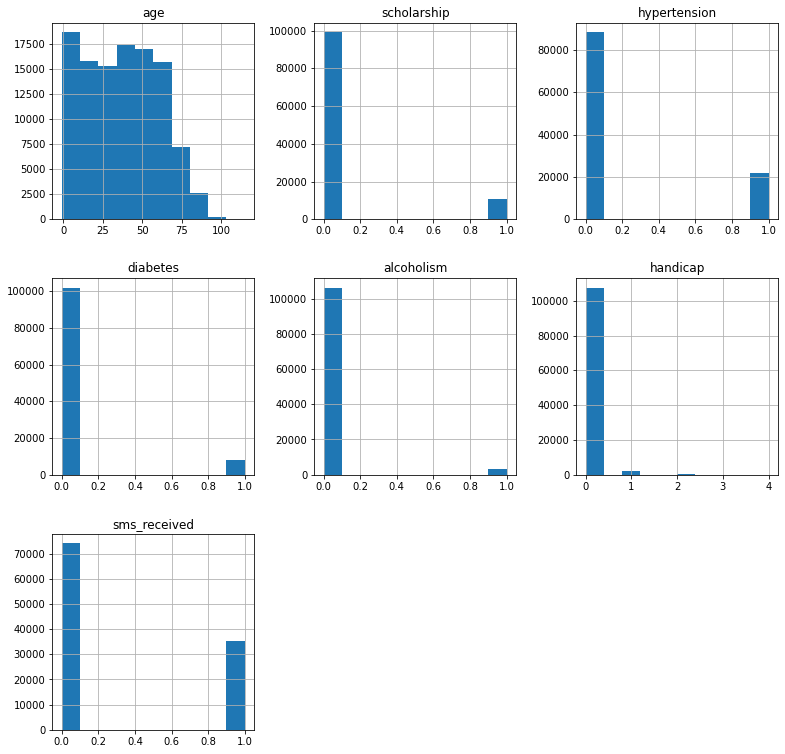

In [15]:
df.hist(figsize=(13,13));

The number of those who showed up are generally more than those who did not show up

### Research Question 2
#### Using the different Characteristics to compare the number who showed up and those who didn't show

In [16]:
# Function to plot Bar Chart for all the different values
def plt_bar_chart(cols, colour, chart_title, y_label, x_label):
    sns.countplot(x=cols, hue='no_show', data=df, palette=colour)
    plt.title(chart_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

#### Research Question 2(i)

##### Who showed up more between Male and Female Gender?

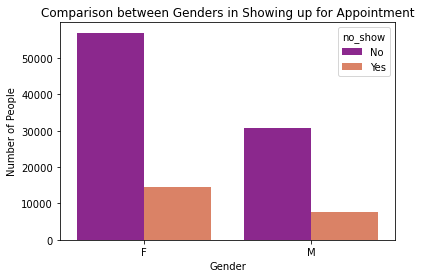

In [17]:
plt_bar_chart('gender', 'plasma', 'Comparison between Genders in Showing up for Appointment', 'Number of People', 'Gender')

Comparison between Genders in Showing up for Appointment shows that more Female showed up compared to the number of Male who did, and more Female did not show up compared to the number of Male who did. This is because the number of Females are far much more than the numbers of Male. 

#### Research Question 2(ii)

##### Who showed up more between Welfare beneficiaries and Non-beneficiaries?

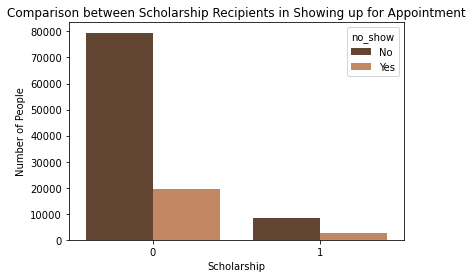

In [18]:
plt_bar_chart('scholarship', 'copper', 'Comparison between Scholarship Recipients in Showing up for Appointment', 'Number of People', 'Scholarship')

Comparison based on Scholarship basis in Showing up for Appointment reveals that only a few persons have access to the scholarship. Therefore, the scholarship basis can not be sufficiently used as a factor to predict why they did not show.

#### Research Question 2(iii)

#### Who showed up more between Hypertensive and Non-Hypertensive Patients?

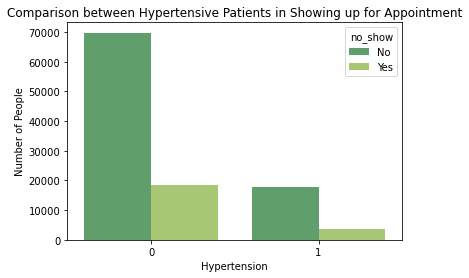

In [19]:
plt_bar_chart('hypertension', 'summer', 'Comparison between Hypertensive Patients in Showing up for Appointment', 'Number of People', 'Hypertension')

Comparison based on Hypertension in Showing up for Appointment reveals that more people without hypertension did not show up for their appointments compared to those who had hypertension

#### Research Question 2(iv)

#### Who showed up more between Diabetic and Non-Diabetic Patients?

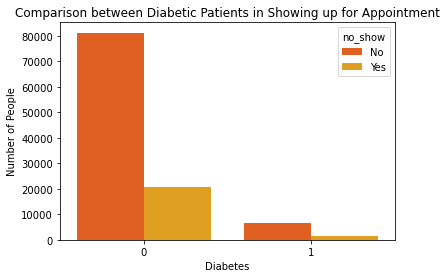

In [20]:
plt_bar_chart('diabetes', 'autumn', 'Comparison between Diabetic Patients in Showing up for Appointment', 'Number of People', 'Diabetes')

Comparison based on Diabetes in Showing up for Appointment reveals that more people without Diabetes did not show up for their appointments compared to those who had Diabetes

#### Research Question 2(v)

#### Who showed up more between Alcoholic and Non-Alcoholic Patients?¶

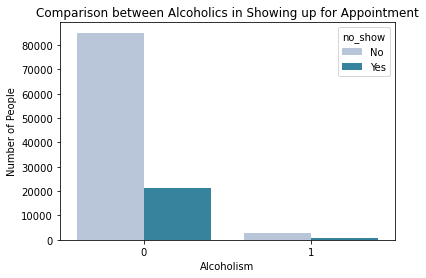

In [21]:
plt_bar_chart('alcoholism', 'PuBuGn', 'Comparison between Alcoholics in Showing up for Appointment', 'Number of People', 'Alcoholism')

Comparison based on Alcoholism in Showing up for Appointment reveals that more people who are not alcoholic did not show up for their appointments compared to those who are alcoholic

### Pie Chart to show the percentage of people who did show up and those who didn't show up

In [22]:
no = df[df['no_show']=='No'].count()['no_show']
print(no)

87754


In [23]:
yes = df[df['no_show']=='Yes'].count()['no_show']
print(yes)

22051


Text(0.5, 1.0, 'Distribution of Appointment Status')

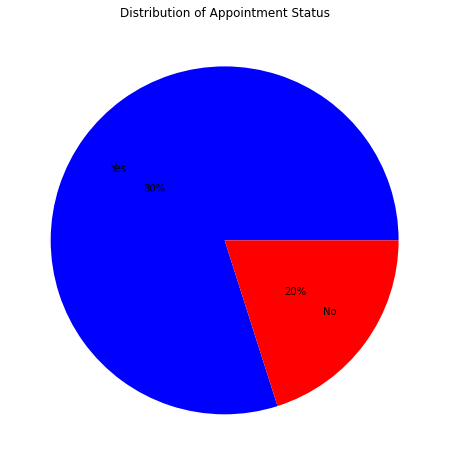

In [24]:
plt.figure(figsize=(8,8))
plt.pie(x=[no, yes], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Appointment Status')

80% of applicants did not show up for their Appointment, while 20% did show up.

<a id='conclusions'></a>
## Conclusions

Comparison between Genders in Showing up for Appointment shows that more Female showed up compared to the number of Male who did, and more Female did not show up compared to the number of Male who did. This is because the number of Females are far much more than the numbers of Male.

Comparison based on Scholarship basis in Showing up for Appointment reveals that only a few persons have access to the scholarship. Therefore, the scholarship basis can not be sufficiently used as a factor to predict why they did not show.

Comparison based on Hypertension in Showing up for Appointment reveals that more people without hypertension did not show up for their appointments compared to those who had hypertension

Comparison based on Diabetes in Showing up for Appointment reveals that more people without Diabetes did not show up for their appointments compared to those who had Diabetes

Comparison based on Alcoholism in Showing up for Appointment reveals that more people who are not alcoholic did not show up for their appointments compared to those who are alcoholic

## Limitations

This study has the following limitations:
    i. The age was not analysed because it was not group into age brackets (children and adult).
    ii. The Neighbourhood was not also analysed since no useful information was given about its nearness to the Appointment location.